In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

#print(mouse_data.count())
#print(clinical_trial_data.count())

# Combine into a single dataset
trial_data_complete = pd.merge(clinical_trial_data,mouse_data,  how="outer", on=["Mouse ID", "Mouse ID"])

trial_data_complete.head().round(2)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.00,0,Capomulin
1,b128,5,45.65,0,Capomulin
2,b128,10,43.27,0,Capomulin
3,b128,15,43.78,0,Capomulin
4,b128,20,42.73,0,Capomulin


In [2]:
# Find mean of data Grouped by Drug and Timepoint 
mean_trial_data  = trial_data_complete.groupby(["Drug","Timepoint"]).mean()
mean_trial_data.head()


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [3]:
# Find standard error of data Grouped by Drug and Timepoint 
sems_trial_data  = trial_data_complete.groupby(["Drug","Timepoint"]).sem()
#sems_trial_data

In [4]:
#TUMOUR SIZE

# Calculate means and standard error of tumour size
drug_list = sorted(trial_data_complete["Drug"].unique())
timepoint_list = sorted(trial_data_complete["Timepoint"].unique())
div= len(timepoint_list)
lim = len(drug_list)


mean_summary_df= pd.DataFrame({"Timepoint":timepoint_list})
sem_summary_df= pd.DataFrame({"Timepoint":timepoint_list})

for i in range(0, lim):
    column_1 = mean_trial_data.iloc[(i * div):(i * div + div)]
    drug = drug_list[i]
    mean_summary_df[f"{drug}"]=column_1["Tumor Volume (mm3)"].tolist()
    
    column_2 = sems_trial_data.iloc[(i * div):(i * div + div)]
    sem_summary_df[f"{drug}"]=column_2["Tumor Volume (mm3)"].tolist()
           
mean_summary_df.set_index('Timepoint')
#sem_summary_df.set_index('Timepoint')


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


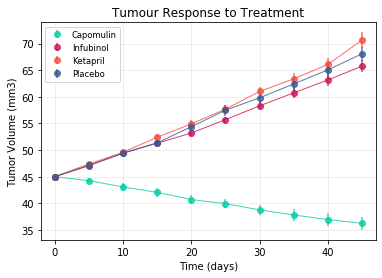

In [5]:
#03CEA4 - green capomulin
#345995 - blue placebo
#CA1551 - red infubinol
#FB4D3D - orange ketapril


fig, ax = plt.subplots()

ax.errorbar(timepoint_list, mean_summary_df["Capomulin"], 
            yerr=sem_summary_df["Capomulin"], fmt="o", color="#03CEA4",
            alpha=0.8, label="Capomulin")

ax.errorbar(timepoint_list, mean_summary_df["Infubinol"], 
            yerr=sem_summary_df["Infubinol"], fmt="o", color="#CA1551",
            alpha=0.8, label="Infubinol")

ax.errorbar(timepoint_list, mean_summary_df["Ketapril"], 
            yerr=sem_summary_df["Ketapril"], fmt="o", color="#FB4D3D",
            alpha=0.8, label="Ketapril")

ax.errorbar(timepoint_list, mean_summary_df["Placebo"], 
            yerr=sem_summary_df["Placebo"], fmt="o", color="#345995",
            alpha=0.8, label="Placebo")

ax.plot(timepoint_list, mean_summary_df["Capomulin"], color="#03CEA4",
            alpha=0.8, linewidth=1)

ax.plot(timepoint_list, mean_summary_df["Infubinol"],color="#CA1551",
            alpha=0.8,linewidth=1)

ax.plot(timepoint_list, mean_summary_df["Ketapril"], color="#FB4D3D",
            alpha=0.8, linewidth=1)

ax.plot(timepoint_list, mean_summary_df["Placebo"], color="#345995",
            alpha=0.8, linewidth=1)

ax.set_xlim(-2, 47)

ax.set_title("Tumour Response to Treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)

ax.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, axis='both')


plt.savefig("Images/Tumor_Volume.png")
plt.show()


In [6]:
##METASTATIC RESPONSE TO TREATMENT

# Calculate means and standard error of metastatic response
met_res_mean_summary_df= pd.DataFrame({"Timepoint":timepoint_list})
met_res_sem_summary_df= pd.DataFrame({"Timepoint":timepoint_list})

for i in range(0, lim):
    column_1 = mean_trial_data.iloc[(i * div):(i * div + div)]
    met_res_mean_summary_df[f"{drug_list[i]}"]=column_1["Metastatic Sites"].tolist()
    
    column_2 = sems_trial_data.iloc[(i * div):(i * div + div)]
    met_res_sem_summary_df[f"{drug_list[i]}"]=column_2["Metastatic Sites"].tolist()
    
           
met_res_mean_summary_df.set_index('Timepoint')
met_res_sem_summary_df.set_index('Timepoint')
met_res_mean_summary_df

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


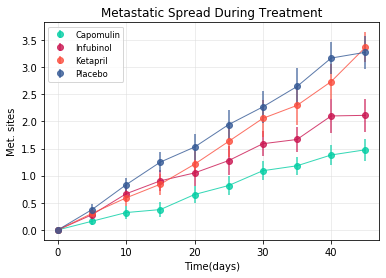

In [7]:
fig, ax = plt.subplots()

ax.errorbar(timepoint_list, met_res_mean_summary_df["Capomulin"], 
            yerr=met_res_sem_summary_df["Capomulin"], fmt="o", 
            color="#03CEA4", alpha=0.8, label="Capomulin")

ax.errorbar(timepoint_list, met_res_mean_summary_df["Infubinol"], 
            yerr=met_res_sem_summary_df["Infubinol"], fmt="o", 
            color="#CA1551", alpha=0.8, label="Infubinol")

ax.errorbar(timepoint_list, met_res_mean_summary_df["Ketapril"], 
            yerr=met_res_sem_summary_df["Ketapril"], fmt="o", 
            color="#FB4D3D",alpha=0.8, label="Ketapril")

ax.errorbar(timepoint_list, met_res_mean_summary_df["Placebo"], 
            yerr= met_res_sem_summary_df["Placebo"], fmt="o", 
            color="#345995", alpha=0.8, label="Placebo")

ax.plot(timepoint_list, met_res_mean_summary_df["Capomulin"], 
        color="#03CEA4", alpha=0.8, linewidth=1)

ax.plot(timepoint_list, met_res_mean_summary_df["Infubinol"],
        color="#CA1551",alpha=0.8,linewidth=1)

ax.plot(timepoint_list, met_res_mean_summary_df["Ketapril"], 
        color="#FB4D3D",alpha=0.8, linewidth=1)

ax.plot(timepoint_list, met_res_mean_summary_df["Placebo"], 
        color="#345995",alpha=0.8, linewidth=1)

ax.set_xlim(-2, 47)

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Time(days)")
ax.set_ylabel("Met. sites")

plt.legend(loc="best", fontsize="small", fancybox=True)

ax.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, axis='both',
        which='both')


plt.savefig("Images/Metastatic_sites.png")
plt.show()


In [8]:
#SURVIVAL RATES
survival_rates_data  = trial_data_complete.groupby(["Drug","Timepoint"]).count()
survival_rates_data.head()


Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23

In [9]:
survival_summary_df= pd.DataFrame({"Timepoint":timepoint_list})
total_mice_in_study = []


for i in range(0, lim):
    column_1 = survival_rates_data.iloc[(i * div):(i * div + div)]
    survival_summary_df[f"{drug_list[i]}"]=column_1["Mouse ID"].tolist()
    total_mice_in_study.append(column_1["Mouse ID"].iloc[0])
    

#print(drug_list)
#print(total_mice_in_study)
#survival_summary_df

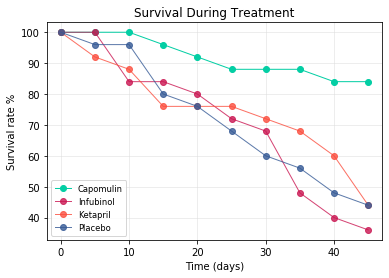

In [10]:
fig, ax = plt.subplots()

ax.plot(timepoint_list, 100*survival_summary_df["Capomulin"]/total_mice_in_study[0], marker="o",
        color="#03CEA4",  linewidth=1, label = "Capomulin")

ax.plot(timepoint_list, 100*survival_summary_df["Infubinol"]/total_mice_in_study[2],marker="o",
        color="#CA1551",alpha=0.8,linewidth=1, label = "Infubinol")

ax.plot(timepoint_list, 100*survival_summary_df["Ketapril"]/total_mice_in_study[3], marker="o",
        color="#FB4D3D",alpha=0.8, linewidth=1, label = "Ketapril")

ax.plot(timepoint_list, 100*survival_summary_df["Placebo"]/total_mice_in_study[5], marker="o",
        color="#345995",alpha=0.8, linewidth=1, label = "Placebo")

ax.set_xlim(-2, 47)

ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival rate %")

ax.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, axis='both',
        which='both')

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Images/Survival_rates.png")
plt.show()


In [11]:
starting_sizes = []
final_sizes = []


for i in range(0, lim):
    starting_sizes.append(mean_summary_df[f"{drug_list[i]}"].iloc[0])
    final_sizes.append(mean_summary_df[f"{drug_list[i]}"].iloc[9])   

    
starting_sizes
final_sizes
percentage_change =  [100*(final_sizes[i] - starting_sizes[i])/starting_sizes[i]
                     for i in range(len(starting_sizes))]

percentage_change_df = pd.DataFrame({"Percentage Change": percentage_change})
percentage_change_df


,Percentage Change
0,-19.475303
1,42.516492
2,46.123472
3,57.028795
4,53.923347
5,51.297960
6,47.241175
7,-22.320900
8,52.085134
9,46.579751


In [12]:
#Separate out positive and negative change
pos_change = percentage_change_df.copy()
neg_change = percentage_change_df.copy()

pos_change[pos_change <= 0] = 0 
neg_change[neg_change > 0] =  0

#np.nan
#print(pos_change)
#print(neg_change)


short_pos = [ pos_change["Percentage Change"].iloc[0], pos_change["Percentage Change"].iloc[2], 
              pos_change["Percentage Change"].iloc[3],pos_change["Percentage Change"].iloc[5]]
#pos = np.array(short_pos).astype(np.int)
#short_pos_mask = np.isfinite(pos)

short_neg = [ neg_change["Percentage Change"].iloc[0], neg_change["Percentage Change"].iloc[2], 
              neg_change["Percentage Change"].iloc[3],neg_change["Percentage Change"].iloc[5]]
#neg = np.array(short_neg).astype(np.int)
#short_neg_mask = np.isfinite(neg)

short_names = [ drug_list[0], drug_list[2], drug_list[3],drug_list[5]]
print(short_names)

print(short_pos)
#print(short_pos_mask)

print(short_neg)
#print(short_neg_mask)


['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
[0.0, 46.123471727851836, 57.02879468660604, 51.29796048315153]
[-19.47530266789416, 0.0, 0.0, 0.0]


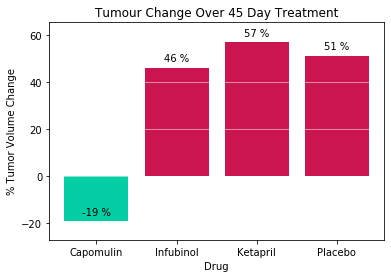

In [13]:
fig, ax = plt.subplots()

x_axis = np.arange(0, len(short_names))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

ax.set_title("Tumour Change Over 45 Day Treatment")
ax.set_xlabel("Drug")
ax.set_ylabel("% Tumor Volume Change")

ax.grid(color='#FFFFFF', linestyle='-', linewidth=0.5, axis='y')

#ax.xlim(-0.75, len(short_names)-.25)
ax.set_ylim(min(percentage_change)-5, max(percentage_change) + 0.15*max(percentage_change))

rects1 = ax.bar(short_names, short_pos, facecolor="#CA1551", alpha=1, align="center")
rects2 = ax.bar(short_names, short_neg, facecolor="#03CEA4", alpha=1, align="center")

ax.set_xticks(tick_locations, short_names)

#, rotation =45, ha="right"


def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        if height != 0 :
            # Fraction of axis height taken up by this rectangle
            p_height = (height / y_height)

            # If we can fit the label above the column, do that;
            # otherwise, put it inside the column.
            if p_height > 0.95: # arbitrary; 95% looked good to me.
                label_position = height - (y_height * 0.05)
            else:
                label_position = height + (y_height * 0.02)

            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                    '%d %%'%(height),
                    ha='center', va='bottom')
            

autolabel(rects1, ax)
autolabel(rects2, ax)



plt.savefig("Images/Tumor_Volume_percentage_change.png")

plt.show()
